<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Task_6/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting task

Make a copy of this colab file and follow the instructions to complete the task. You are expected to complete the entire task and it would be appreciated if you did more than what is aksed from you. 


ALL THE BEST!

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb


colour = sns.color_palette()

Reading and converting data into a date-time format

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/yashyaks/compute_tasks/main/Task_6/AEP_hourly.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [11]:
df['Datetime']=pd.to_datetime(df['Datetime'])

Plot the data: 

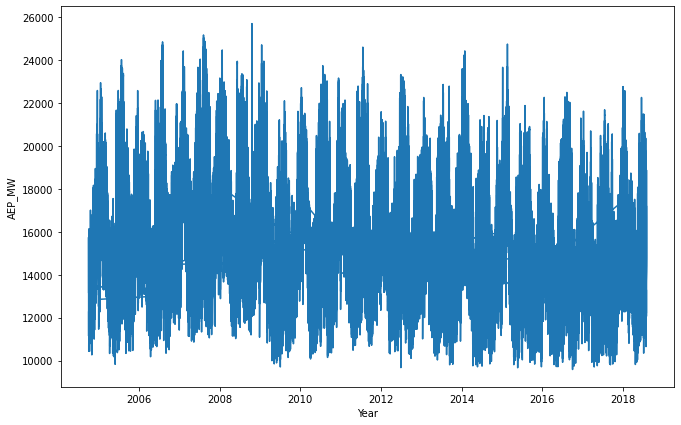

In [12]:
plt.figure(figsize=(11,7))
plt.plot(df['Datetime'],df['AEP_MW'])
plt.xlabel('Year')
plt.ylabel('AEP_MW')
plt.show()

## Data splitting

Split the data into training and testing data, split data at 01-01-2016

In [13]:
df1=df[df['Datetime']<='01-01-2016']
df2=df[df['Datetime']>'01-01-2016']

plot the train and test data

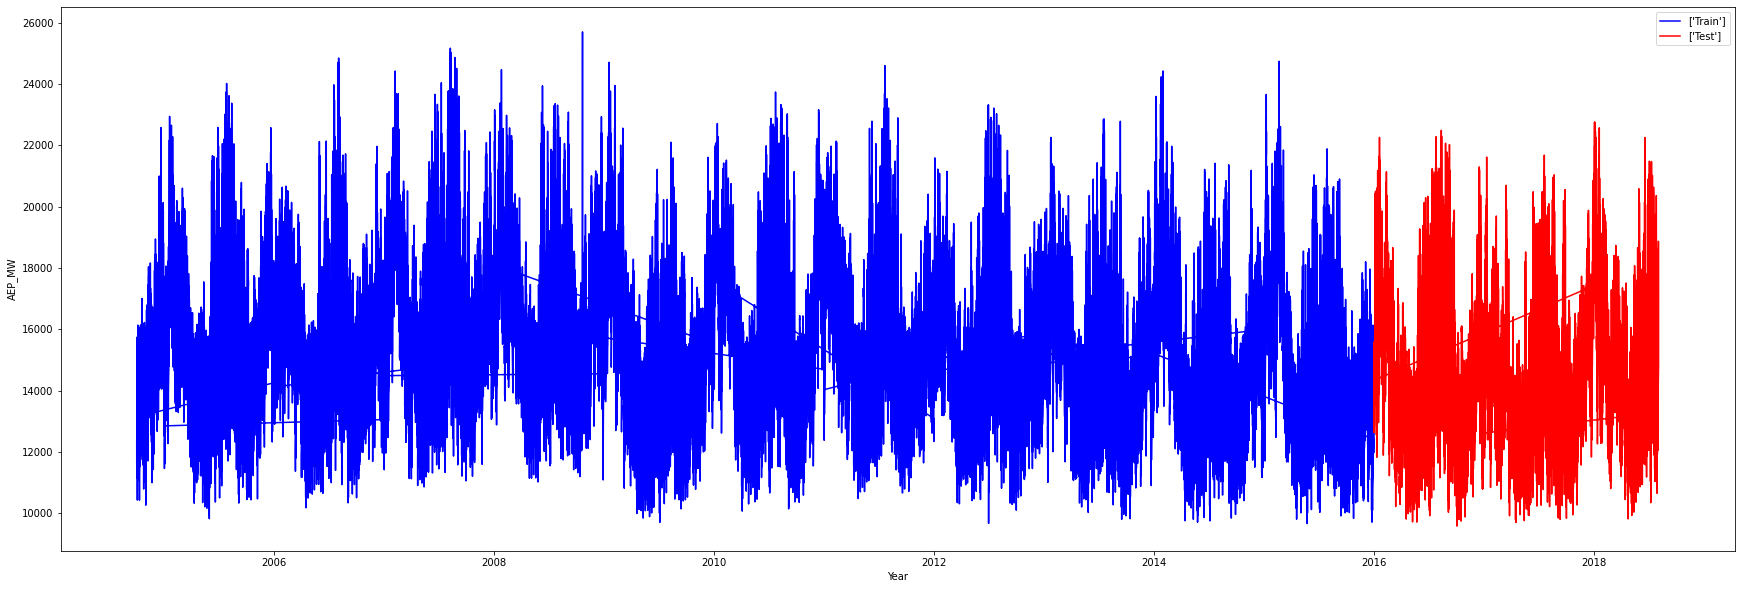

In [14]:
plt.figure(figsize=(30,10))
plt.plot(df1['Datetime'],df1['AEP_MW'],color='blue',label=['Train'])
plt.plot(df2['Datetime'],df2['AEP_MW'],color='red',label=['Test'])
plt.xlabel('Year')
plt.ylabel('AEP_MW')
plt.legend()
plt.show()

Plot data for a random week AND day, to visualize weekly and daily variations in data

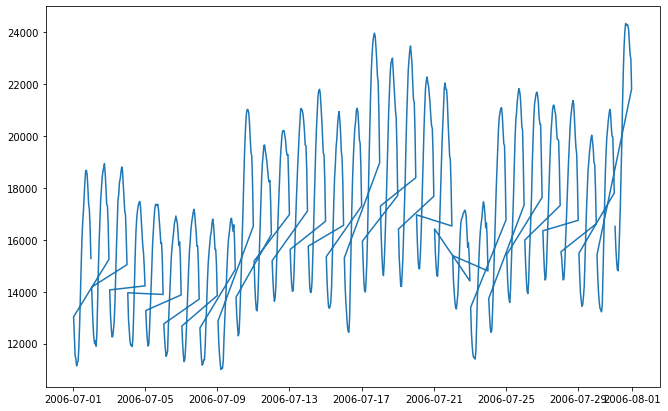

In [18]:
# random month
plt.figure(figsize=(11,7))
plt.plot(df[(df['Datetime']>'07-01-2006')&(df['Datetime']<'08-01-2006')]['Datetime'],df[(df['Datetime']>'07-01-2006')&(df['Datetime']<'08-01-2006')]['AEP_MW'])

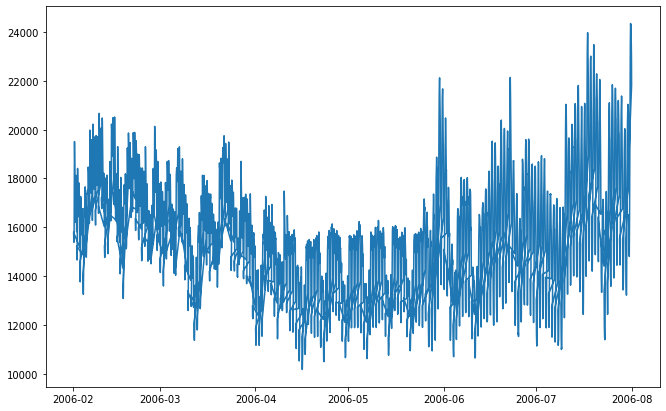

In [19]:
# span of 6 months
plt.figure(figsize=(11,7))
plt.plot(df[(df['Datetime']>'02-01-2006')&(df['Datetime']<'08-01-2006')]['Datetime'],df[(df['Datetime']>'02-01-2006')&(df['Datetime']<'08-01-2006')]['AEP_MW'])

## Feature Creation


Create different features for: hour, day, month, year, week and append it to the data-frame

In [20]:
def feature(df):
  df['Date']=df['Datetime']
  df['Hour']=df['Datetime'].dt.hour
  df['Day of the week']=df['Datetime'].dt.dayofweek
  df['Day of year']=df['Datetime'].dt.day
  df['Week of year']=df['Datetime'].dt.weekofyear
  df['Month']=df['Datetime'].dt.month
  df['Year']=df['Datetime'].dt.year
  df3=df[['Date','Hour','Day of the week','Day of year','Month','Year','Week of year']]
  return(df3)

In [21]:
df3=feature(df1)

<ipython-input-20-f489fa63dc75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Datetime']
<ipython-input-20-f489fa63dc75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df['Datetime'].dt.hour
<ipython-input-20-f489fa63dc75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [22]:
df3['AEP_MW']=df1['AEP_MW']

<ipython-input-22-e42d5e26bf8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['AEP_MW']=df1['AEP_MW']


In [23]:
df4=feature(df2)

<ipython-input-20-f489fa63dc75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Datetime']
<ipython-input-20-f489fa63dc75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df['Datetime'].dt.hour
<ipython-input-20-f489fa63dc75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [24]:
df4['AEP_MW']=df2['AEP_MW']

<ipython-input-24-c80fbf755ed1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['AEP_MW']=df2['AEP_MW']


Make boxplots to depict energy consumption hourly and monthly.(x variable would be hour and month and y variable would be the feature 'AEP_MW'

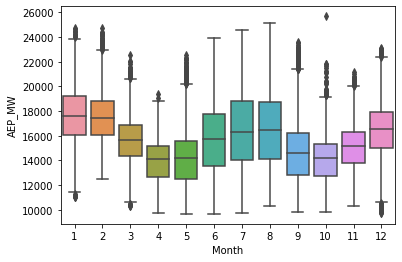

In [25]:
sns.boxplot(x='Month',y='AEP_MW',data=df3)

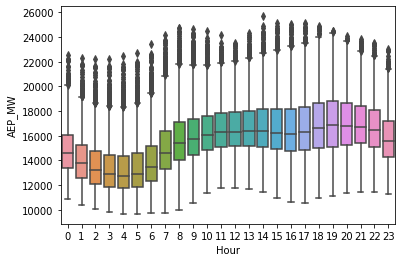

In [26]:
sns.boxplot(x='Hour',y='AEP_MW',data=df3)

## Model Creation andEestimation

Run a regression XGBoost model on the training and testing data-set. Take 1000 estimators and learnning rate as 0.01 

In [27]:
reg=xgb.XGBRegressor()

In [28]:
x_train=df3.iloc[:,1:7].values
y_train=df3.iloc[:,7].values

In [29]:
x_test=df4.iloc[:,1:7].values
y_test=df4.iloc[:,7].values

In [30]:
reg.fit(x_train,y_train)

[14:56:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Predict values for the testing set using the model and plot them

In [31]:
y_pred=reg.predict(x_test)

Use RMSE to find out the accuracy of your model

In [32]:
mean_squared_error(y_test,y_pred)

3143439.7815516577

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.48790845291752905

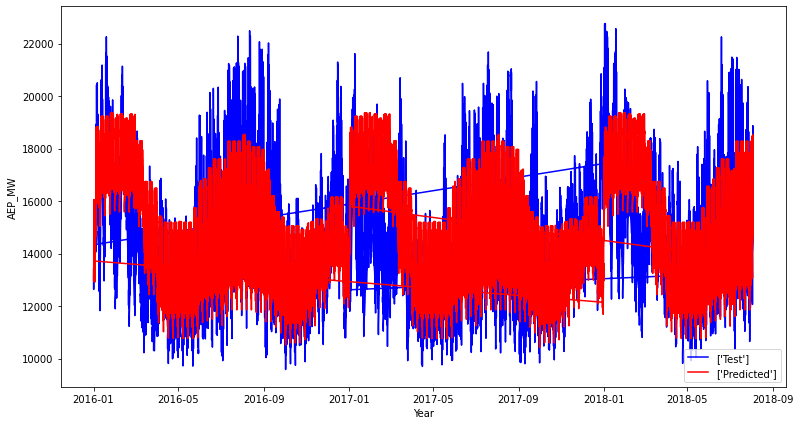

In [34]:
plt.figure(figsize=(13,7))
plt.plot(df4['Date'],y_test,color='blue',label=['Test'])
plt.plot(df4['Date'],y_pred,color='red',label=['Predicted'])
plt.xlabel('Year')
plt.ylabel('AEP_MW')
plt.legend(loc='lower right')

Find the importance of each feature use

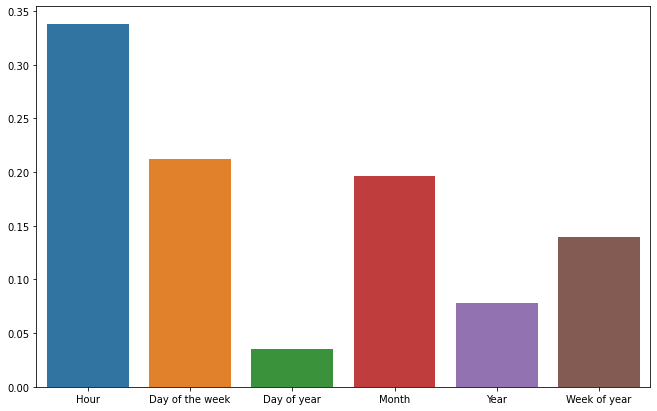

In [35]:
plt.figure(figsize=(11,7))
sns.barplot(x=df4.iloc[:,1:7].columns,y=reg.feature_importances_)